# Analysis of Tweets on Generative AI

### Import Packages & Download Dataset

In [4]:
# install tweetnlp
# ! pip install tweetnlp

In [5]:
# import packages
import os
import pandas as pd
from datetime import datetime as dt
import numpy as np
import tweetnlp
import spacy

c:\Users\rrinehart\Documents\Anaconda\envs\nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-01-03 12:49:21,374	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-01-03 12:49:21,624	INFO util.py:159 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [103]:
full_df = pd.read_csv(r'dataset/GenerativeAI tweets.csv')
full_df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
2,2,2023-04-19 21:26:57+00:00,1648800376479715328,Mind blowing next wave #generativeai platform...,timreha
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle


In [104]:
len(full_df)

56221

Due to the size of the dataset, we will select a sample size of 100 tweets to develop the project with.

In [14]:
# select 10,000 random tweets
sample = full_df.sample(n = 100, random_state = 42)

df = pd.DataFrame(sample)
df.sort_values(by = 'Datetime', ascending = False, inplace = True)
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
454,454,2023-04-19 13:01:01+00:00,1648673055030358018,"In case you missed it, ChatGPT was banned in I...",CyNetX2
729,729,2023-04-19 06:38:43+00:00,1648576845187514368,@Mar3_AI #MAR3AI #GenerativeAI done..🔥 🚀\n\n@L...,Cryptoqor
828,828,2023-04-19 02:19:15+00:00,1648511548040822784,Uncleared music samples sourced from YouTube t...,aiwizard_ai
971,971,2023-04-18 20:52:44+00:00,1648429377531830272,"@josephsirosh, wanted to extend a personal inv...",RobLoCascio
1414,1414,2023-04-18 12:26:43+00:00,1648302034418802688,Ada releases new automated generative AI-drive...,cuwyl


In [105]:
half = full_df.sample(n = round(len(full_df)/2), random_state = 42)

df = pd.DataFrame(half)
df.sort_values(by = 'Datetime', ascending = False, inplace = True)
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle
6,6,2023-04-19 21:21:48+00:00,1648799078342426625,Salesforce announces plans to integrate Einste...,annebonnerdata


In [106]:
len(df)

28110

In [107]:
df.dtypes

Unnamed: 0     int64
Datetime      object
Tweet Id       int64
Text          object
Username      object
dtype: object

To process the data, we will:
1. Drop the unnamed column (duplicate index)
2. Change the datetime column to datetime datatype


In [108]:
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle
6,2023-04-19 21:21:48+00:00,1648799078342426625,Salesforce announces plans to integrate Einste...,annebonnerdata


In [110]:
df['Datetime'] = pd.to_datetime(df['Datetime'], format = '%Y-%m-%d %H:%M:%S%z')
df.head()

,Datetime,Tweet Id,Text,Username
0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle
6,2023-04-19 21:21:48+00:00,1648799078342426625,Salesforce announces plans to integrate Einste...,annebonnerdata


In [111]:
# check datatypes again
df.dtypes

Datetime    datetime64[ns, UTC]
Tweet Id                  int64
Text                     object
Username                 object
dtype: object

Let's check what the text of the tweets look like.

In [19]:
# check full text of a tweet
df.iloc[1, 2]

'@Mar3_AI #MAR3AI #GenerativeAI done..🔥 🚀\n\n@LightofDayz \n@Bookworm_24 @Krrishna_08'

By examining the text of a few tweets, we can observe a number of interesting features which we should address:
*  Newline characters (\n)
* Link at the end of the Tweet
* Hashtags (#StableLM)
* Mentions (@StabilityAI)

Let's start with removing the newline characters.

In [20]:
df['Text'] = df['Text'].str.replace('\n', '')
df.iloc[1, 2]

'@Mar3_AI #MAR3AI #GenerativeAI done..🔥 🚀@LightofDayz @Bookworm_24 @Krrishna_08'

In [21]:
df.iloc[0,2]

'In case you missed it, ChatGPT was banned in Italy over privacy concerns, making it the first Western country to block this advanced #AI technology. https://t.co/lxEkYaNVIs#DataPrivacy #GenerativeAI https://t.co/Sjqcy0FVli'

Viewing another tweet reveals that it contains "&amp;", which is the HTML entity code for an ampersand (&). I will also replace this.

In [22]:
df['Text'] = df['Text'].str.replace('&amp;', '&')
df.iloc[0,2]

'In case you missed it, ChatGPT was banned in Italy over privacy concerns, making it the first Western country to block this advanced #AI technology. https://t.co/lxEkYaNVIs#DataPrivacy #GenerativeAI https://t.co/Sjqcy0FVli'

Next, I want to see if more Tweets include a link.

In [23]:
# select 5 random tweets and print the full text
tweets = []
for i in range(5):
  x = np.random.randint(0, len(df))
  text = df.iloc[i, 2]
  tweets.append(text)
tweets

['In case you missed it, ChatGPT was banned in Italy over privacy concerns, making it the first Western country to block this advanced #AI technology. https://t.co/lxEkYaNVIs#DataPrivacy #GenerativeAI https://t.co/Sjqcy0FVli',
 '@Mar3_AI #MAR3AI #GenerativeAI done..🔥 🚀@LightofDayz @Bookworm_24 @Krrishna_08',
 'Uncleared music samples sourced from YouTube through randomization. @samplette_io#aiwizard #artificialintelligence #ai #generativeai #musicaihttps://t.co/JRj1fWUFcs',
 "@josephsirosh, wanted to extend a personal invite to our #GenerativeAI launch event where I'll share how #AI is transforming the world's top brands. Would love to hear your take! More info here: https://t.co/BR34gArj0q",
 'Ada releases new automated generative AI-driven customer service suite - Yahoo Finance https://t.co/nlcwGaZgH4 #GAI #GenerativeAI']

All number of these Tweets include a link, so it is likely many more do too. I will separate out all links in to a new column

In [24]:
df['Link'] = df['Text'].str.extract(r'(https?://[^\s]+)')
df['Text'] = df['Text'].str.replace(r'https?://[^\s]+|www\.[^\s]+|t\.co/[^\s]+', '', regex=True)
df.head()

,Datetime,Tweet Id,Text,Username,Link
454,2023-04-19 13:01:01+00:00,1648673055030358018,"In case you missed it, ChatGPT was banned in I...",CyNetX2,https://t.co/lxEkYaNVIs#DataPrivacy
729,2023-04-19 06:38:43+00:00,1648576845187514368,@Mar3_AI #MAR3AI #GenerativeAI done..🔥 🚀@Light...,Cryptoqor,NaN
828,2023-04-19 02:19:15+00:00,1648511548040822784,Uncleared music samples sourced from YouTube t...,aiwizard_ai,https://t.co/JRj1fWUFcs
971,2023-04-18 20:52:44+00:00,1648429377531830272,"@josephsirosh, wanted to extend a personal inv...",RobLoCascio,https://t.co/BR34gArj0q
1414,2023-04-18 12:26:43+00:00,1648302034418802688,Ada releases new automated generative AI-drive...,cuwyl,https://t.co/nlcwGaZgH4


In [25]:
# confirm link is removed
df.iloc[4, 2]

'Ada releases new automated generative AI-driven customer service suite - Yahoo Finance  #GAI #GenerativeAI'

By checking for null values, we can also see that not *all* Tweets include a link.

In [26]:
# check for null values
df.isnull().sum()

Datetime     0
Tweet Id     0
Text         0
Username     0
Link        14
dtype: int64

Next, I want to copy the hashtags (#) and mentions (@) for each Tweet, so that I may further analyze them.

In [27]:
import re

r1 = "#\w+"
r2 = "@\w+"

df['Hashtag'] = df['Text'].str.findall(r1)
df['Mention'] = df['Text'].str.findall(r2)
df.head()

,Datetime,Tweet Id,Text,Username,Link,Hashtag,Mention
454,2023-04-19 13:01:01+00:00,1648673055030358018,"In case you missed it, ChatGPT was banned in I...",CyNetX2,https://t.co/lxEkYaNVIs#DataPrivacy,"[#AI, #GenerativeAI]",[]
729,2023-04-19 06:38:43+00:00,1648576845187514368,@Mar3_AI #MAR3AI #GenerativeAI done..🔥 🚀@Light...,Cryptoqor,NaN,"[#MAR3AI, #GenerativeAI]","[@Mar3_AI, @LightofDayz, @Bookworm_24, @Krrish..."
828,2023-04-19 02:19:15+00:00,1648511548040822784,Uncleared music samples sourced from YouTube t...,aiwizard_ai,https://t.co/JRj1fWUFcs,"[#aiwizard, #artificialintelligence, #ai, #gen...",[@samplette_io]
971,2023-04-18 20:52:44+00:00,1648429377531830272,"@josephsirosh, wanted to extend a personal inv...",RobLoCascio,https://t.co/BR34gArj0q,"[#GenerativeAI, #AI]",[@josephsirosh]
1414,2023-04-18 12:26:43+00:00,1648302034418802688,Ada releases new automated generative AI-drive...,cuwyl,https://t.co/nlcwGaZgH4,"[#GAI, #GenerativeAI]",[]


To explore how TweetNLP handles mentions and hashtags, we will use testcases with a couple of the models

In [28]:
# testing with NER model
model = tweetnlp.NER()

testcase = 'For example, @Microsoft and #Google and @Amazon are all big tech companies. So is @IBM'
model.ner(testcase)

OSError: Can't load config for 'tner/roberta-large-tweetner7-all'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'tner/roberta-large-tweetner7-all' is the correct path to a directory containing a config.json file

In [ ]:
# testing with the sentiment model

model = tweetnlp.Sentiment()

# define the 4 testcases
senTest = pd.DataFrame()
testcases = ['I love dogs',
             'I #love dogs',
             'I hate dogs',
             'I #hate dogs']

for string in testcases:
  result = model.sentiment(string, return_probability = True)
  negative, neutral, positive = result['probability'].values()
  # create df for comparing the results
  newdf = pd.DataFrame({
    'Phrase' : [string],
    'Negative' : [negative],
    'Neutral' : [neutral],
    'Positive' : [positive]
  })
  senTest = pd.concat([senTest,newdf], ignore_index = True)



senTest
# create visualization to emphasize?

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,Phrase,Negative,Neutral,Positive
0,I love dogs,0.011600,0.056431,0.931969
1,I #love dogs,0.006855,0.025927,0.967218
2,I hate dogs,0.859892,0.117777,0.022331
3,I #hate dogs,0.920269,0.066798,0.012934


### Load Model

In [32]:
# load medium spacy model
spacy.cli.download("en_core_web_md")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [33]:
nlp = spacy.load("en_core_web_md")

### Data Exploration

#### What are the most common words or phrases about genAI?

In [34]:
df['Nouns'] = None

# iterate over df rows as index, row pairs
for index, row in df.iterrows():
    doc = nlp(row['Text'])
    # extract nouns and append to 'Nouns' column
    nouns = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ == 'NOUN'] #and token.text != '♥'
    df.at[index, 'Nouns'] = nouns

df.head()

,Datetime,Tweet Id,Text,Username,Link,Hashtag,Mention,Nouns
454,2023-04-19 13:01:01+00:00,1648673055030358018,"In case you missed it, ChatGPT was banned in I...",CyNetX2,https://t.co/lxEkYaNVIs#DataPrivacy,"[#AI, #GenerativeAI]",[],"[case, privacy, concerns, country, technology,..."
729,2023-04-19 06:38:43+00:00,1648576845187514368,@Mar3_AI #MAR3AI #GenerativeAI done..🔥 🚀@Light...,Cryptoqor,NaN,"[#MAR3AI, #GenerativeAI]","[@Mar3_AI, @LightofDayz, @Bookworm_24, @Krrish...",[]
828,2023-04-19 02:19:15+00:00,1648511548040822784,Uncleared music samples sourced from YouTube t...,aiwizard_ai,https://t.co/JRj1fWUFcs,"[#aiwizard, #artificialintelligence, #ai, #gen...",[@samplette_io],"[music, samples, randomization, artificialinte..."
971,2023-04-18 20:52:44+00:00,1648429377531830272,"@josephsirosh, wanted to extend a personal inv...",RobLoCascio,https://t.co/BR34gArj0q,"[#GenerativeAI, #AI]",[@josephsirosh],"[invite, generativeai, launch, event, world, b..."
1414,2023-04-18 12:26:43+00:00,1648302034418802688,Ada releases new automated generative AI-drive...,cuwyl,https://t.co/nlcwGaZgH4,"[#GAI, #GenerativeAI]",[],"[customer, service, suite, generativeai]"


In [35]:
from collections import Counter
combined_nouns = []
for lyst in df['Nouns']:
    if isinstance(combined_nouns, list):
        combined_nouns.extend(lyst)

noun_counts = Counter(combined_nouns)
noun_counts.most_common(10)

[('generativeai', 36),
 ('images', 10),
 ('chatgpt', 9),
 ('artificialintelligence', 8),
 ('ai', 7),
 ('art', 7),
 ('technology', 6),
 ('aiart', 6),
 ('generativeart', 6),
 ('business', 4)]

Words like 'images', 'aiart', and 'art' hint at the buzz around AI art generators, such as OpenAI's DALL·E 2, which launched on April 6th, 2022.

### What are the most common *named entities*?

In [36]:
model = tweetnlp.NER()

df['Entities'] = None
result_list = []

for index, row in df.iterrows():
    entities = model.ner(row['Text'])
    # extract entities and append to entity column
    df.at[index, 'Entities'] = entities

df.head()

OSError: Can't load config for 'tner/roberta-large-tweetner7-all'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'tner/roberta-large-tweetner7-all' is the correct path to a directory containing a config.json file

There are entities which begin with an extra space (e.g. ' #StableDiffusion) as well as entities which start with @ or # (e.g. '@useroldyWarp', '#StableDiffusion'). Additionally, the NER model is incorrectly recognizing ' @' and ' #' as entities. To address both of these, I will remove leading or trailing whitespaces, as well as leading @ or #.

In [ ]:
# remove leading spaces, @, and #
def clean_ent(entity):
    entity = entity.strip()
    if entity and entity != '':
        if entity.startswith('@'):
            entity = entity[1:]
        elif entity.startswith('#'):
            entity = entity[1:]
        return entity
    return None


def clean_ent_list(ent_list):
    if isinstance(ent_list, list):
        return [{'type': entity_dict['type'], 'entity': clean_ent(entity_dict['entity'])} for entity_dict in ent_list]
    else:
        return []
    
df['Entities'] = df['Entities'].apply(clean_ent_list)
df.head()

,Datetime,Tweet Id,Text,Username,Link,Hashtag,Mention,Nouns,Entities
454,2023-04-19 13:01:01+00:00,1648673055030358018,"In case you missed it, ChatGPT was banned in I...",CyNetX2,https://t.co/lxEkYaNVIs#DataPrivacy,"[#AI, #GenerativeAI]",[],"[case, privacy, concerns, country, technology,...","[{'type': 'product', 'entity': 'ChatGPT'}, {'t..."
729,2023-04-19 06:38:43+00:00,1648576845187514368,@Mar3_AI #MAR3AI #GenerativeAI done..🔥 🚀@Light...,Cryptoqor,NaN,"[#MAR3AI, #GenerativeAI]","[@Mar3_AI, @LightofDayz, @Bookworm_24, @Krrish...",[],"[{'type': 'person', 'entity': 'userar3_AI'}, {..."
828,2023-04-19 02:19:15+00:00,1648511548040822784,Uncleared music samples sourced from YouTube t...,aiwizard_ai,https://t.co/JRj1fWUFcs,"[#aiwizard, #artificialintelligence, #ai, #gen...",[@samplette_io],"[music, samples, randomization, artificialinte...","[{'type': 'corporation', 'entity': 'YouTube'},..."
971,2023-04-18 20:52:44+00:00,1648429377531830272,"@josephsirosh, wanted to extend a personal inv...",RobLoCascio,https://t.co/BR34gArj0q,"[#GenerativeAI, #AI]",[@josephsirosh],"[invite, generativeai, launch, event, world, b...","[{'type': 'person', 'entity': 'josephsirosh,'}..."
1414,2023-04-18 12:26:43+00:00,1648302034418802688,Ada releases new automated generative AI-drive...,cuwyl,https://t.co/nlcwGaZgH4,"[#GAI, #GenerativeAI]",[],"[customer, service, suite, generativeai]","[{'type': 'corporation', 'entity': 'Ada'}, {'t..."


In [ ]:
combined_ents = []
for ent_list in df['Entities']:
    for ent_dict in ent_list:
        ent_val = ent_dict.get('entity')
        if ent_val is not None:
            combined_ents.append(ent_val)

ner_counts = Counter(combined_ents)
ner_counts.most_common(10)

[('ChatGPT', 8),
 ('Microsoft', 4),
 ('GTC23', 3),
 ('StableDiffusion', 3),
 ('AutoGPT', 2),
 ('eBay', 2),
 ('NVIDIA', 2),
 ('useroldyWarp', 2),
 ('Italy', 1),
 ('Western', 1)]

### Plot Tweet Volume vs Time

In [ ]:
! pip install -U matplotlib

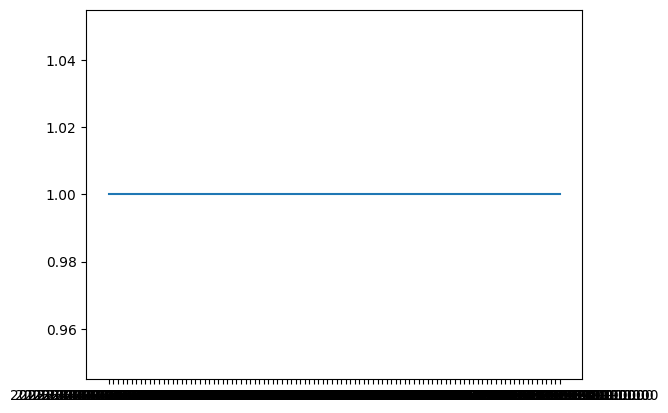

In [112]:
import matplotlib.pyplot as plt 

tweet_vol = half_df['Datetime'].value_counts()
y = half_df['Datetime'].drop_duplicates()

plt.plot(y, tweet_vol)

<Figure size 20000x10000 with 0 Axes>

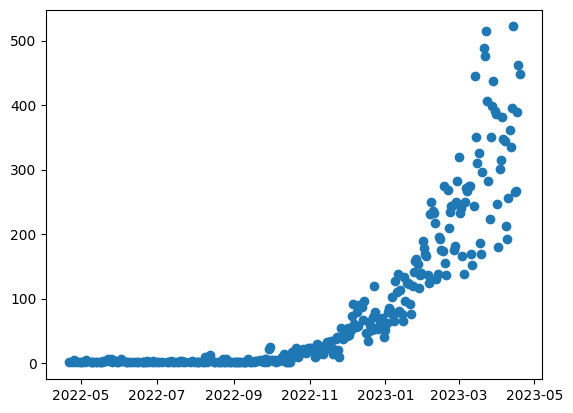

<Figure size 20000x10000 with 0 Axes>

In [123]:
import matplotlib.pyplot as plt 

tvol_df = df.groupby(df['Datetime'].dt.date).size().reset_index(name = 'tweet_count')

plt.scatter(tvol_df['Datetime'], tvol_df['tweet_count'])
plt.figure(figsize = (200, 100))

In [ ]:
# using spacy instead of tweetnlp
# ner_result = []
# for tweet in df['Text']:
# # for tweet in df.iloc[0:10, 2]:
#     doc = nlp(tweet)
#     entities = [(ent.label_, ent.text) for ent in doc.ents]
#     ner_result.extend(entities)
# result_df = pd.DataFrame(ner_result, columns = ['Label', 'Entity'])
# result_df

# top10_ent = result_df['Entity'].value_counts().head(10)
# top10_ent

In [ ]:
# result = model.ner(concat_text)
# for entity, label in result:
#     print(f'Entity: {entity}, Label: {label}')